# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# lets load dataset with data, we are going to only focus on elected data in this assignment
df = pd.read_excel('alldata.xlsx')

display(df.head())
print(df.shape)

530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   

   11a  11b  12a  12b               storkreds  alder  
0   -2    1    1    1    Københavns Storkreds     78  
1    1   -2    0    0          Fyns Storkreds     64  
2    0   -1    1   -2     Bornholms Storkreds     37  
3    2   -1    2    0  Nordjyllands Storkreds     28  
4   -2    0    2   -2    Københavns Storkreds     58  

[5 rows x 53 columns]

(867, 53)


In [115]:
# we are going to use similar color scheme for all plots

party_colors = {
    "Socialdemokratiet": "red",
    "Radikale Venstre": "purple",
    "Det Konservative Folkeparti": "lightgreen",
    "Nye Borgerlige": "darkblue",
    "Socialistisk Folkeparti": "pink",
    "Liberal Alliance": "turquoise",
    "Kristendemokraterne": "grey",
    "Moderaterne": "lavender",
    "Dansk Folkeparti": "yellow",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "limegreen",
    "Enhedslisten": "orange",
    "Venstre": "blue",
    "Danmarksdemokraterne": "skyblue",
    "Alternativet": "green",
    "Løsgænger": "black"
}

In [116]:
# dropping not needed columns, and making the name of the candidate the index
print(df.columns)

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder'],
      dtype='object')


In [117]:
df = df.drop(['alder', 'storkreds'], axis=1)

df = df.set_index('navn')

display(df.head())

530  531  533  534  535  537  538  540  541  543  \
navn                                                                         
Lars Philipsen Prahm       -1   -2    1   -2    2    1   -2    1    1    2   
Karsten Hønge               2    2   -1   -2   -1   -2    1   -2    2   -2   
Martin Kelleher-Petersen    2    1   -2   -2    1   -2    1   -1    1   -1   
Nicklas Gjedsig Larsen      2    1   -2   -1    1    1    1    1    1   -2   
Tom Gillesberg              1    1   -2    2   -2    1   -2    1    2   -2   

                          ...  8a  8b  9a  9b  10a  10b  11a  11b  12a  12b  
navn                      ...                                                
Lars Philipsen Prahm      ...   1   0   2   0    1   -2   -2    1    1    1  
Karsten Hønge             ...   0   0  -2   0   -1    2    1   -2    0    0  
Martin Kelleher-Petersen  ...   1   1  -1  -2    0    2    0   -1    1   -2  
Nicklas Gjedsig Larsen    ...   2   2  -2   2    2    2    2   -1    2    0  
Tom Gillesberg            ...   1   0  -2   0   -1    0   -2    0    2   -2  

[5 rows x 50 columns]

In [118]:
# lets keep actual party of candidate in a separate column
party_data = df['parti']

df = df.drop('parti', axis=1)


In [119]:
# normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

display(df.head())


530       531       533       534       535  \
navn                                                                         
Lars Philipsen Prahm     -0.969068 -1.050586  0.974411 -0.626725  0.776943   
Karsten Hønge             1.140176  1.426255 -0.334364 -0.626725 -1.441310   
Martin Kelleher-Petersen  1.140176  0.807044 -0.988752 -0.626725  0.037525   
Nicklas Gjedsig Larsen    1.140176  0.807044 -0.988752  0.094883  0.037525   
Tom Gillesberg            0.437094  0.807044 -0.988752  2.259705 -2.180728   

                               537       538       540       541       543  \
navn                                                                         
Lars Philipsen Prahm      0.730695 -0.770004  0.387687  0.824485  1.221737   
Karsten Hønge            -1.214584  1.482842 -1.585649  1.461587 -1.400159   
Martin Kelleher-Petersen -1.214584  1.482842 -0.927870  0.824485 -0.744685   
Nicklas Gjedsig Larsen    0.730695  1.482842  0.387687  0.824485 -1.400159   
Tom Gillesberg            0.730695 -0.770004  0.387687  1.461587 -1.400159   

                          ...        8a        8b        9a        9b  \
navn                      ...                                           
Lars Philipsen Prahm      ... -0.104115 -0.573668  1.660264  0.035293   
Karsten Hønge             ... -1.307690 -0.573668 -1.177486  0.035293   
Martin Kelleher-Petersen  ... -0.104115  0.473427 -0.468049 -1.938816   
Nicklas Gjedsig Larsen    ...  1.099459  1.520523 -1.177486  2.009401   
Tom Gillesberg            ... -0.104115 -0.573668 -1.177486  0.035293   

                               10a       10b       11a       11b       12a  \
navn                                                                         
Lars Philipsen Prahm      0.412750 -1.465489 -0.864900  0.256268  0.333407   
Karsten Hønge            -1.206501  1.011273  1.170942 -1.616075 -0.639872   
Martin Kelleher-Petersen -0.396875  1.011273  0.492328 -0.991961  0.333407   
Nicklas Gjedsig Larsen    1.222376  1.011273  1.849556 -0.991961  1.306686   
Tom Gillesberg           -1.206501 -0.227108 -0.864900 -0.367846  1.306686   

                               12b  
navn                                
Lars Philipsen Prahm      1.164317  
Karsten Hønge             0.345612  
Martin Kelleher-Petersen -1.291797  
Nicklas Gjedsig Larsen    0.345612  
Tom Gillesberg           -1.291797  

[5 rows x 49 columns]

### Dimensionality Reduction, let's first start with PCA and then move on to t-SNE

In [120]:
from sklearn.decomposition import PCA

# in order to plot the data, we will use PCA with 2 components
pca = PCA(n_components=2)

pca_data = pca.fit_transform(df)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'], index=df.index)

display(pca_df.head())

PC1       PC2
navn                                        
Lars Philipsen Prahm      3.362185 -1.516930
Karsten Hønge            -6.091749  1.191952
Martin Kelleher-Petersen -4.960182 -1.096007
Nicklas Gjedsig Larsen   -4.037529  0.834949
Tom Gillesberg           -0.506901 -0.784740

In [121]:
# lets check how much variance is explained by the two components
print(pca.explained_variance_ratio_)

print("Sum of explained variance: ")
print(pca.explained_variance_ratio_.sum())


[0.41737636 0.10259865]
Sum of explained variance: 
0.519975012179386


As we can see 2 components cover around 50% of the variance, which is not that great, but in order to visualize the data, we are bound to use 2 components.

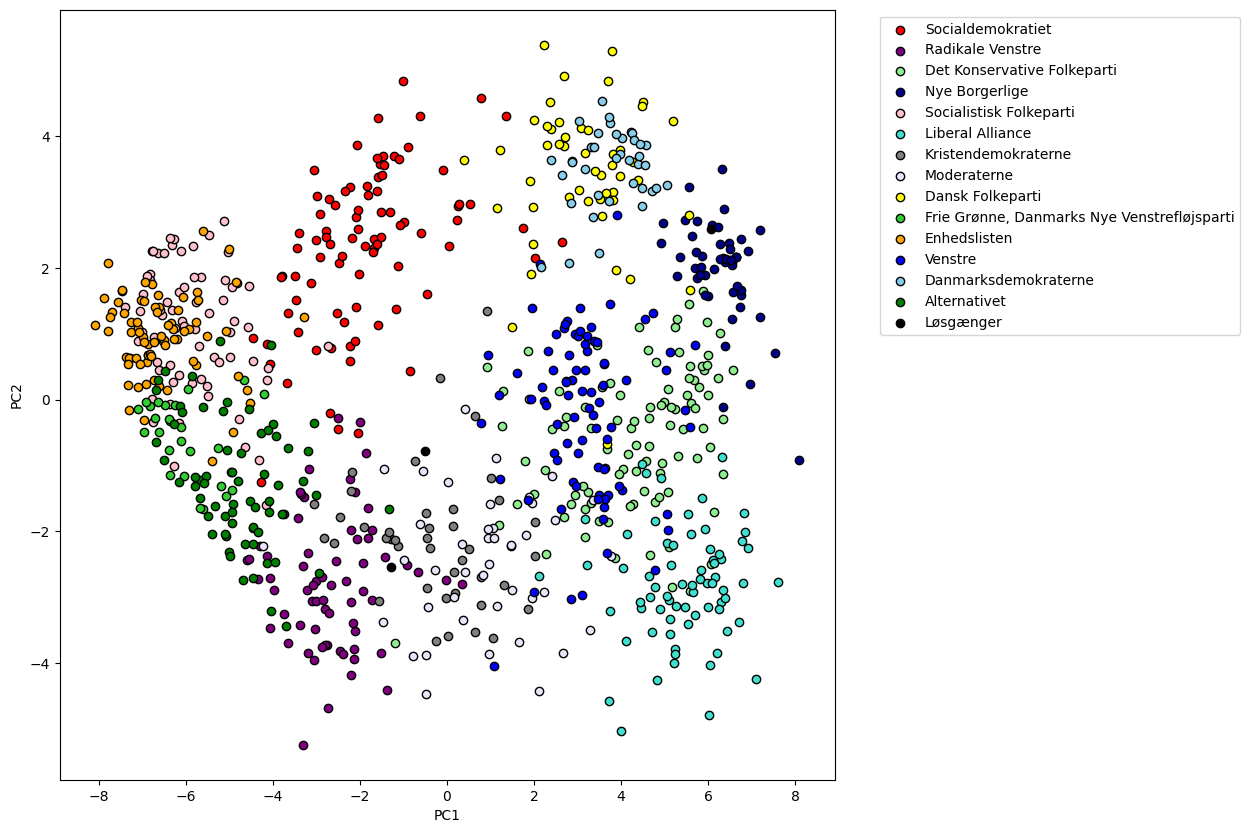

In [122]:
# lets plot the data from the pca

pca_df['party'] = party_data

plt.figure(figsize=(10, 10))

for party in party_colors.keys():
    party_df = pca_df[pca_df['party'] == party]
    plt.scatter(party_df['PC1'], party_df['PC2'], c=party_colors[party], label=party, edgecolors='black')

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


This plot shows the parties and their positions in the 2D space, and we can see that members of the same party are close to each other, which is a good sign.

In [123]:
# lets for each Principal componet, check which features are most important and get the top 5 

def get_top_features(pca, df, component, n=5):
    component_data = pca.components_[component]
    feature_importance = pd.Series(data=component_data, index=df.columns)
    feature_importance = feature_importance.abs().sort_values(ascending=False)
    return feature_importance.head(n)

print("Top features for PC1")
pc1_most_important = get_top_features(pca, df, 0)
print(pc1_most_important)

print("Top features for PC2")
pc2_most_important = get_top_features(pca, df, 1)
print(pc2_most_important)



Top features for PC1
530    0.190641
537    0.190284
4a     0.188849
3b     0.188778
550    0.188555
dtype: float64
Top features for PC2
10b    0.302918
556    0.297979
551    0.293836
553    0.272808
4b     0.258449
dtype: float64


In [124]:
# let's load question datasets and check what the question were about

tv2q = pd.read_excel('tv2q.xlsx')
drq = pd.read_excel('drq.xlsx')

# using ids we will extract the questions from the datasets

tv2_questions_pc1 = tv2q[tv2q['id'].isin(pc1_most_important.index)][['id', 'question', 'header']]

tv2_questions_pc1 = tv2_questions_pc1.rename(columns={'id': 'ID', 'question': 'Question', 'header': 'Title'})

dr_questions_pc1 = drq[drq['ID'].astype('string').isin(pc1_most_important.index)][['ID', 'Question', 'Title']]

pc1_questions = pd.concat([tv2_questions_pc1, dr_questions_pc1])

display(pc1_questions)


tv2_questions_pc2 = tv2q[tv2q['id'].isin(pc2_most_important.index)][['id', 'question', 'header']]
tv2_questions_pc2 = tv2_questions_pc2.rename(columns={'id': 'ID', 'question': 'Question', 'header': 'Title'})

dr_questions_pc2 = drq[drq['ID'].astype('string').isin(pc2_most_important.index)][['ID', 'Question', 'Title']]
pc2_questions = pd.concat([tv2_questions_pc2, dr_questions_pc2])

display(pc2_questions)




ID                                           Question  \
55   3b                         Ulandsbistanden bør hæves.   
56   4a  Den økonomiske ulighed i det danske samfund bø...   
0   530  Danmark skal bruge flere penge på at styrke to...   
5   537  Det er okay, at den økonomiske ulighed stiger,...   
15  550  Der skal indføres kvoter, der sikrer mindst 30...   

                           Title  
55  Udenrigs- og forsvarspolitik  
56                       Økonomi  
0                KLIMA OG ENERGI  
5                        VELFÆRD  
15      ARBEJDSMARKED OG ØKONOMI

ID                                           Question  \
57   4b  Staten bør i højere grad kompensere danskerne ...   
69  10b  Den såkaldte Arne-pension, der giver mulighed ...   
16  551  Der skal være permanent grænsekontrol mellem D...   
18  553  Der skal udflyttes flere uddannelsespladser fr...   
20  556           Den såkaldte Arne-pension skal afskaffes   

                       Title  
57                   Økonomi  
69             Socialområdet  
16            EU OG UDENRIGS  
18                UDDANNELSE  
20  ARBEJDSMARKED OG ØKONOMI

### But what actually are the questions about?

Let's start with PC1:
- 530 -> Denmark must spend more money on strengthening train and bus operations rather than building new motorways
- 537 -> It is okay for economic inequality to increase as long as the Danes generally become richer
- 4a -> Economic inequality in Danish society should be reduced.
- 3b -> Developing country aid should be increased.
- 550 -> Quotas must be introduced to ensure at least 30 percent women on company boards

PC2:
- 10b -> The so-called Arne pension, which allows for an earlier pension, must be maintained, even if there is a shortage of labour.
- 556 -> The so-called Arne pension must be abolished
- 551 -> There must be permanent border control between Denmark and Germany
- 553 -> More education places must be moved from the big cities
- 4b -> The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about.

It seems that PC1 is more about social policies, while PC2 is more about economic policies.

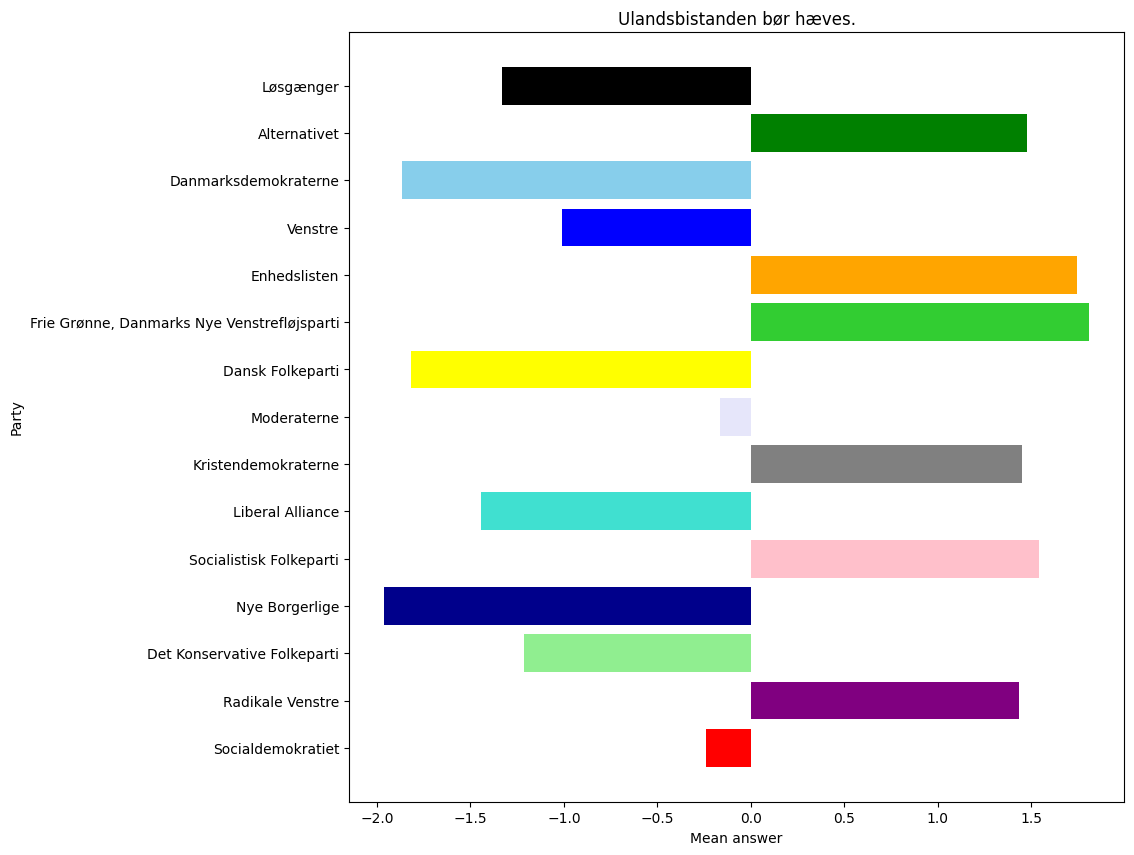

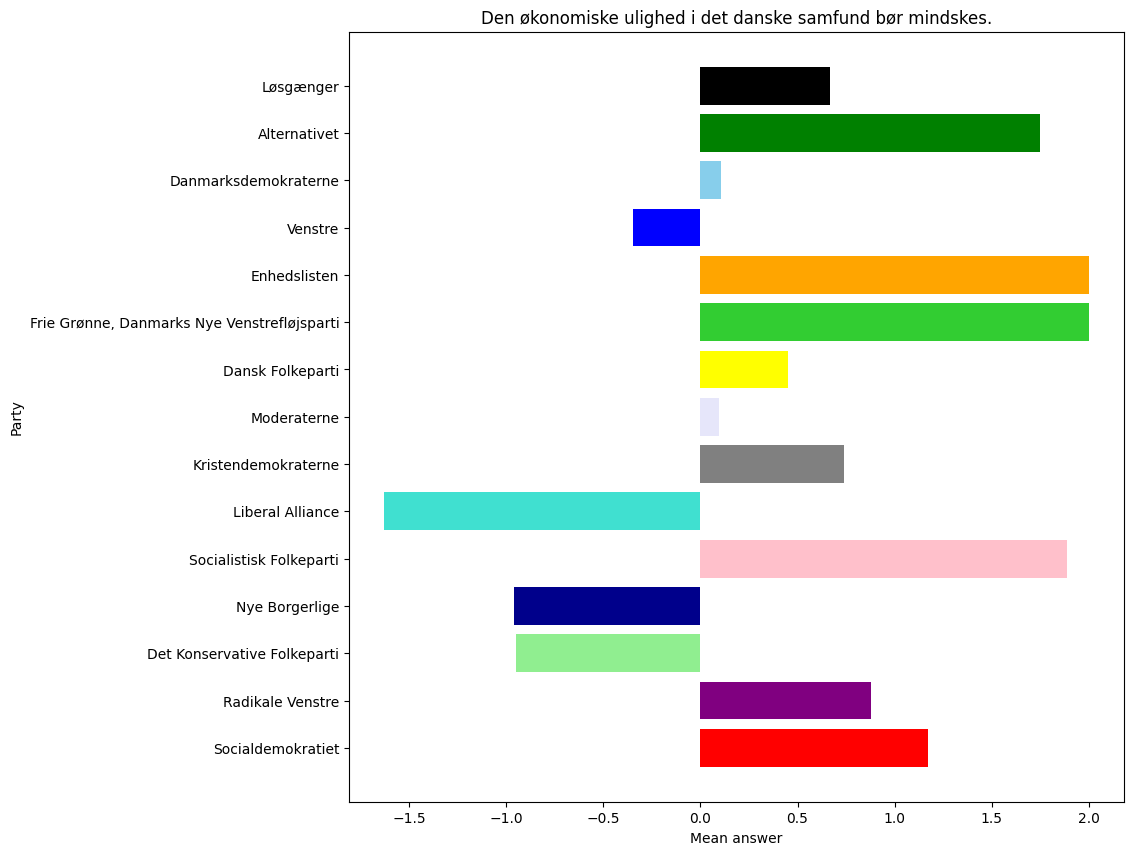

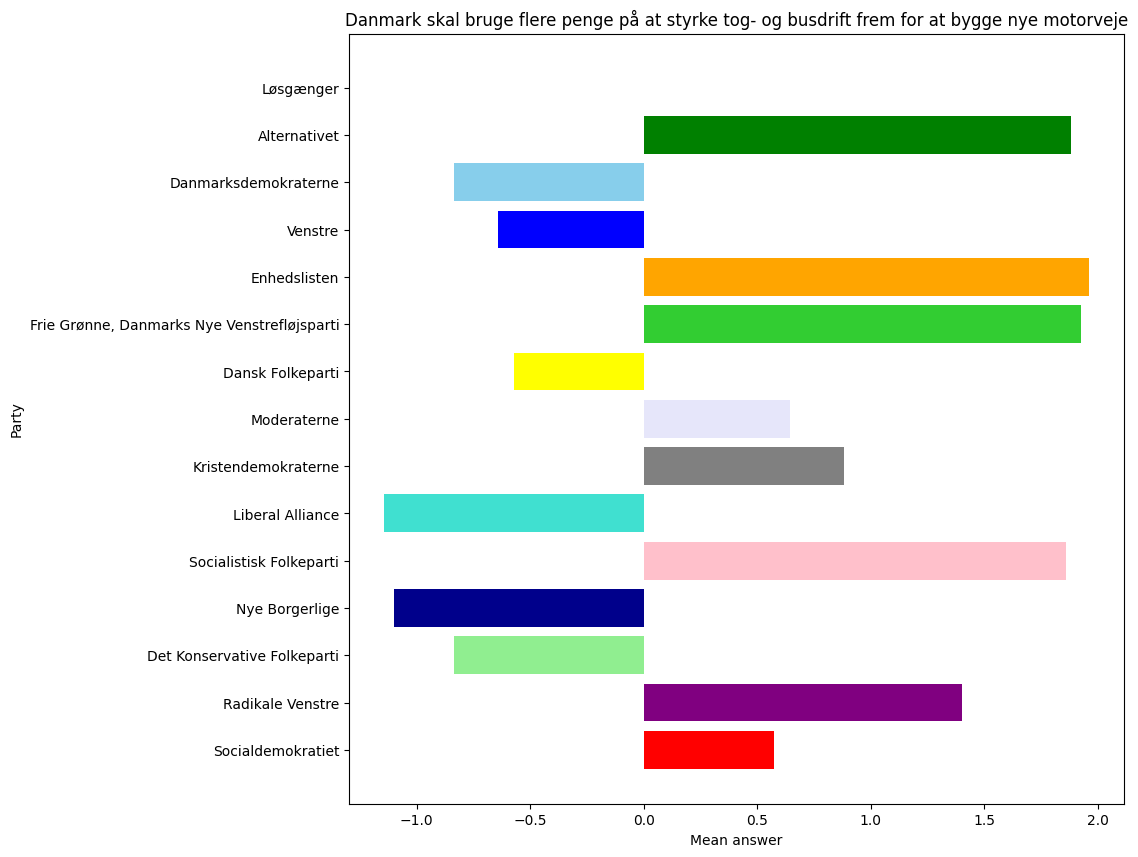

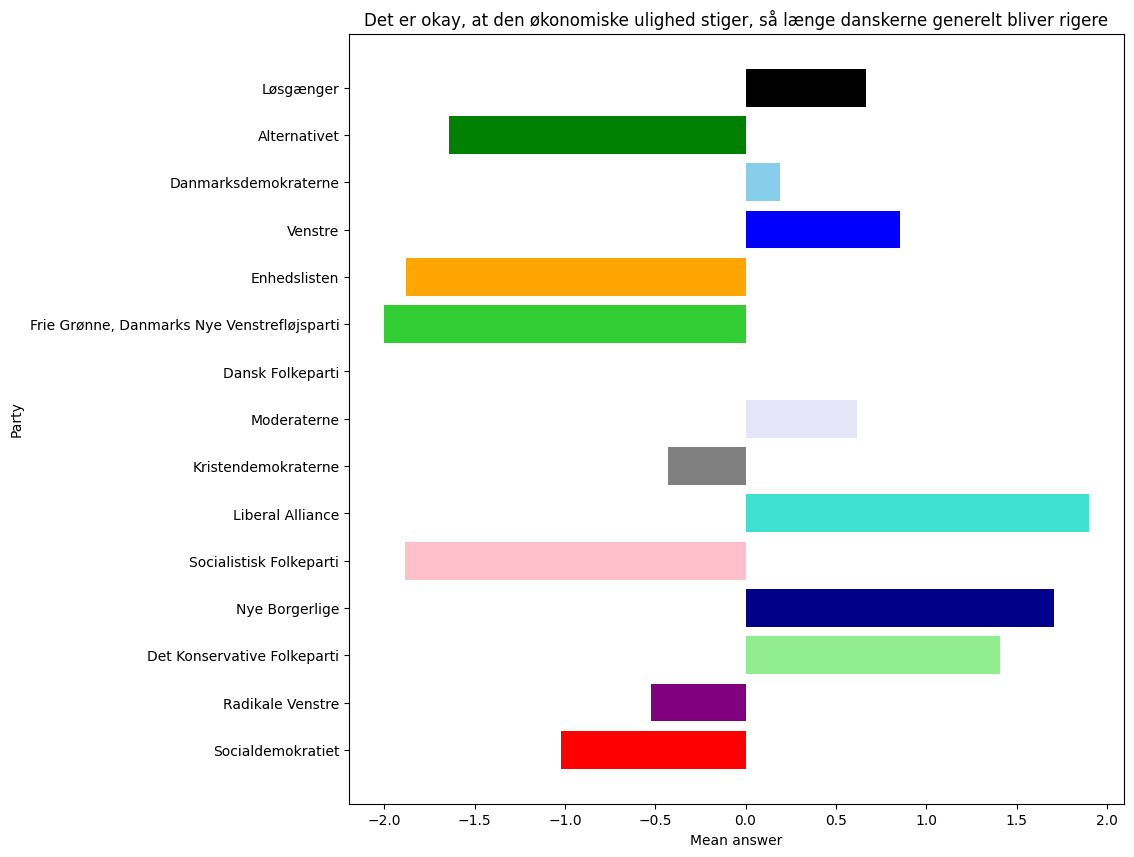

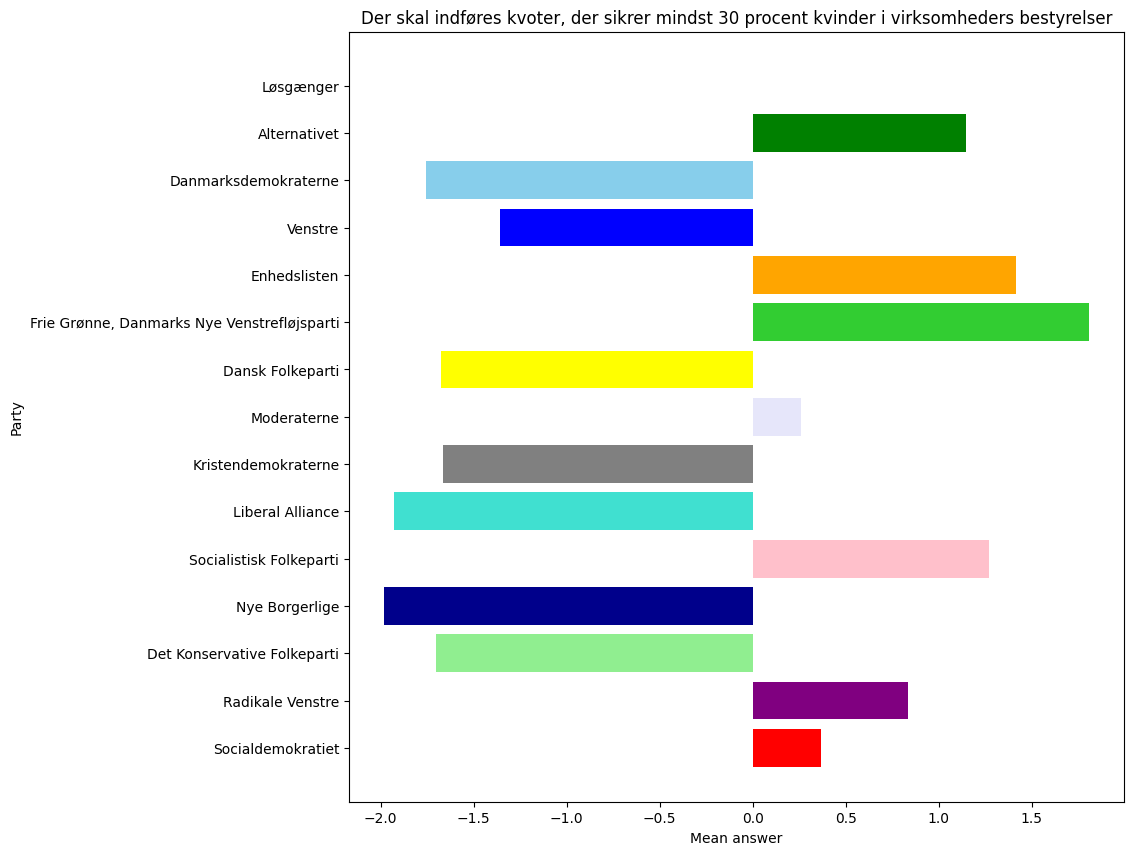

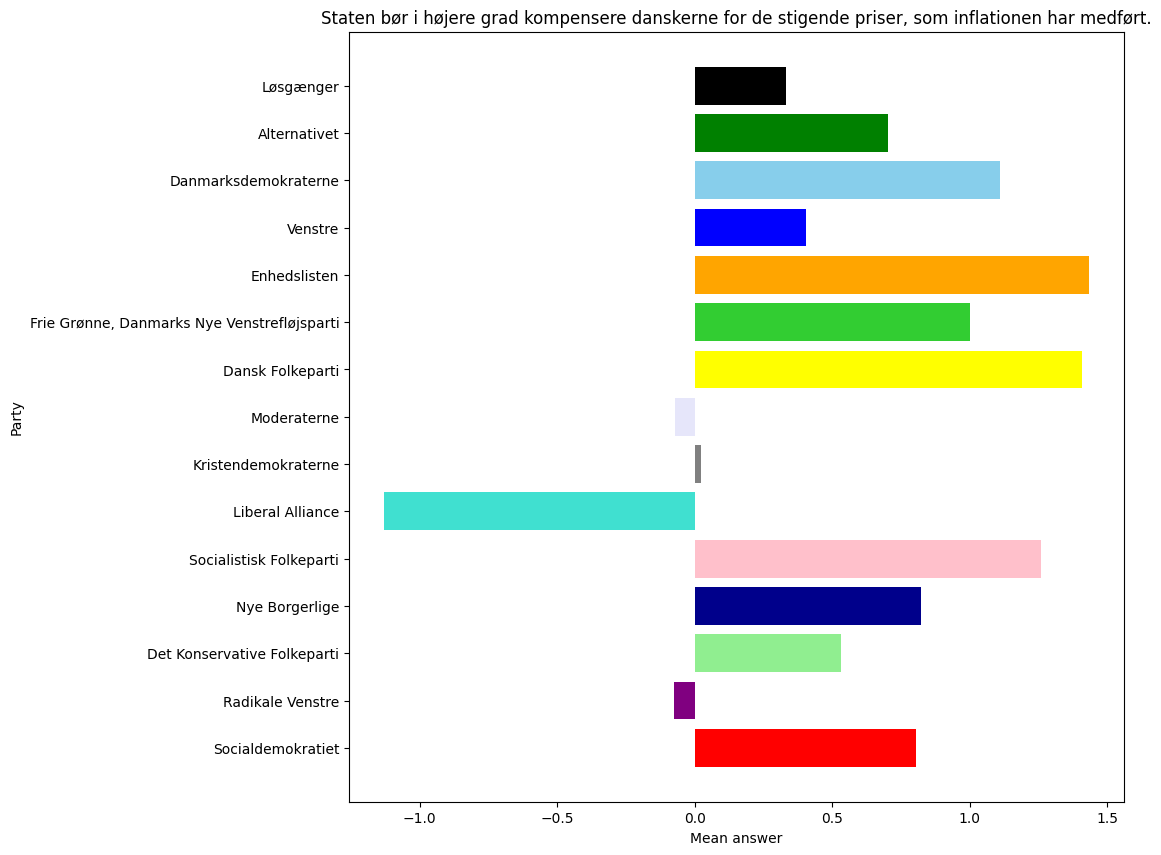

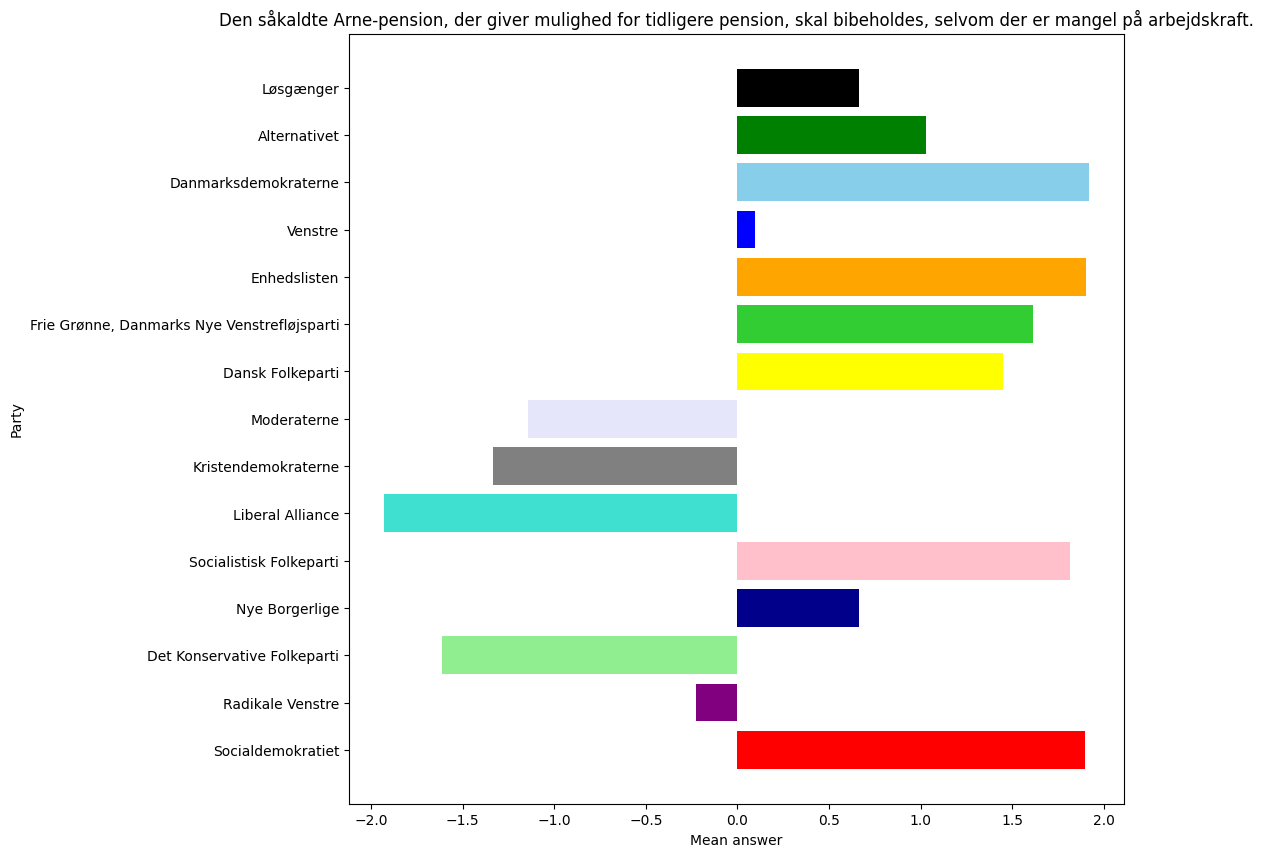

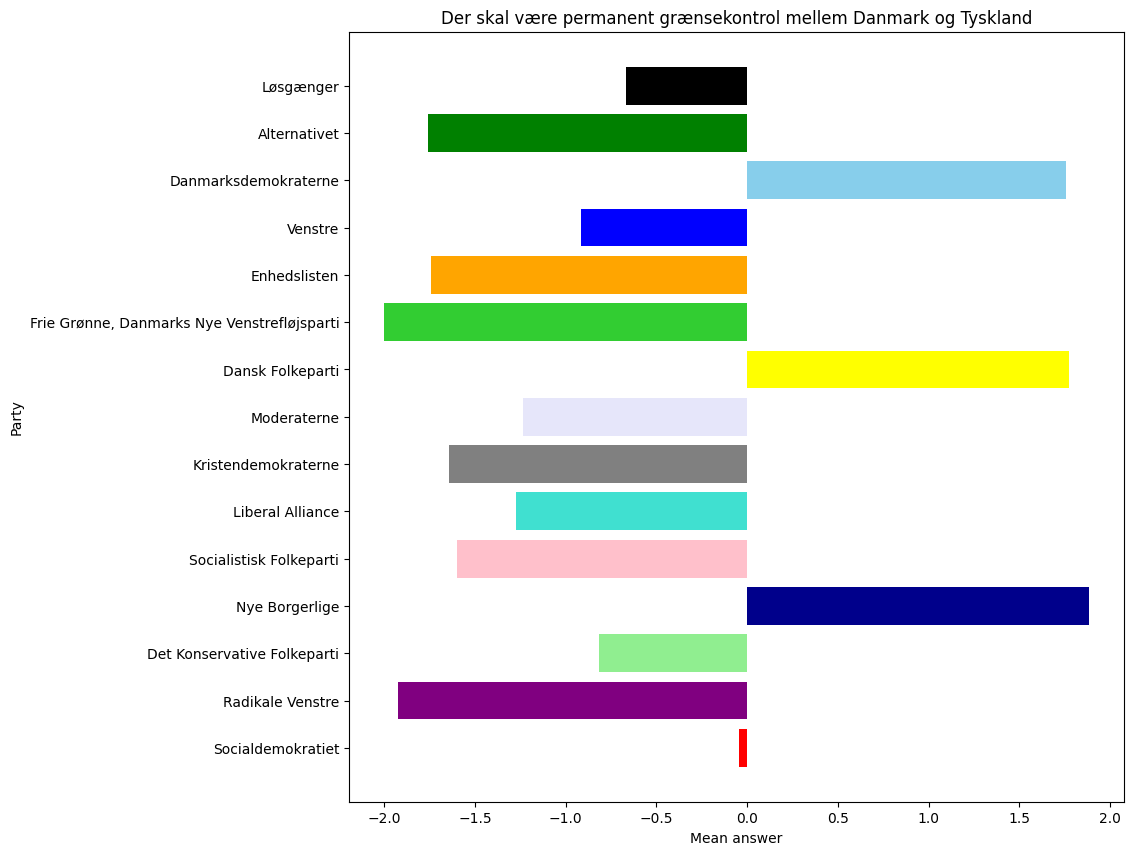

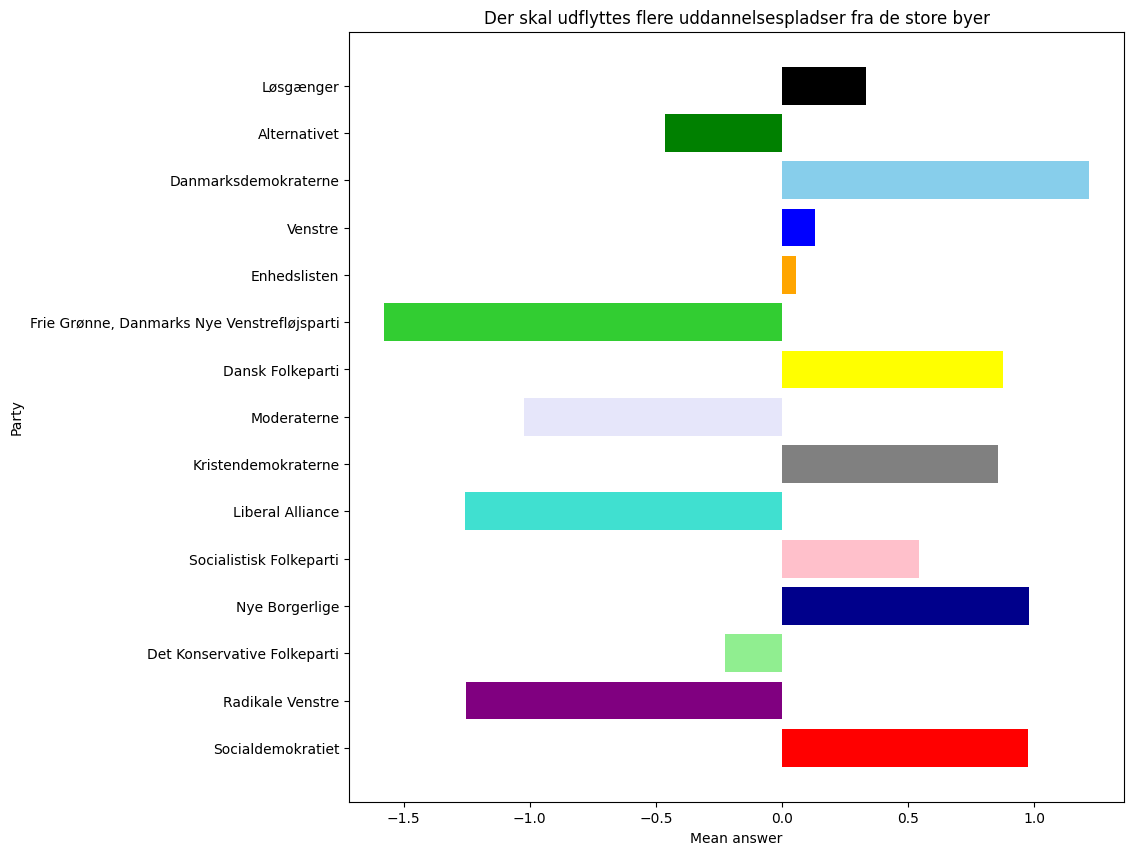

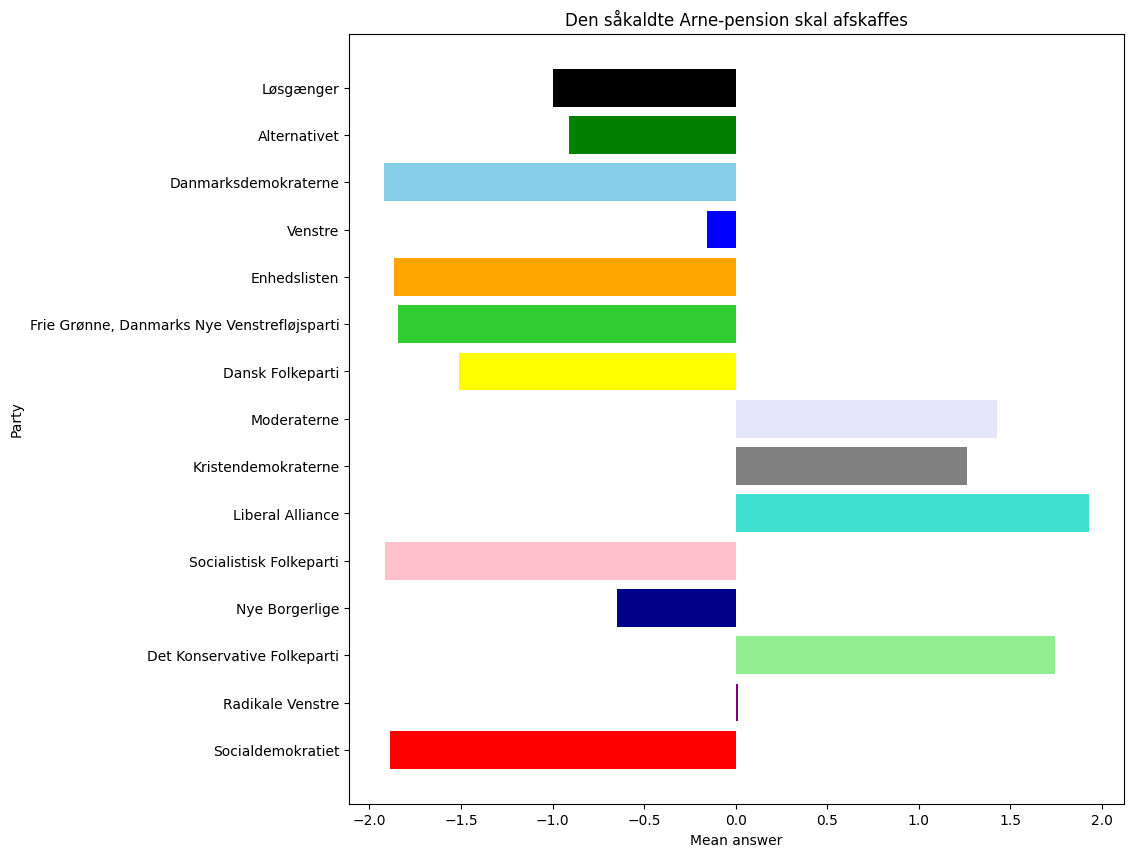

In [125]:
# for each of the questions we were discussing, we will plot mean answers for each party
alldata = pd.read_excel('alldata.xlsx')
alldata = alldata.set_index('navn')

def plot_mean_answers(data, questions_data, party_colors):
    for question_id in questions_data['ID']:
        question = data[str(question_id)]
        tmp = pd.concat([party_data, question], axis=1)
        tmp = tmp.groupby('parti').mean()
        plt.figure(figsize=(10, 10))
        for party in party_colors.keys():
            plt.barh(party, tmp.loc[party], color=party_colors[party])

        plt.title(questions_data[questions_data['ID'] == question_id]['Question'].values[0])
        plt.xlabel('Mean answer')
        plt.ylabel('Party')
        plt.show()

plot_mean_answers(alldata, pc1_questions, party_colors)

plot_mean_answers(alldata, pc2_questions, party_colors)

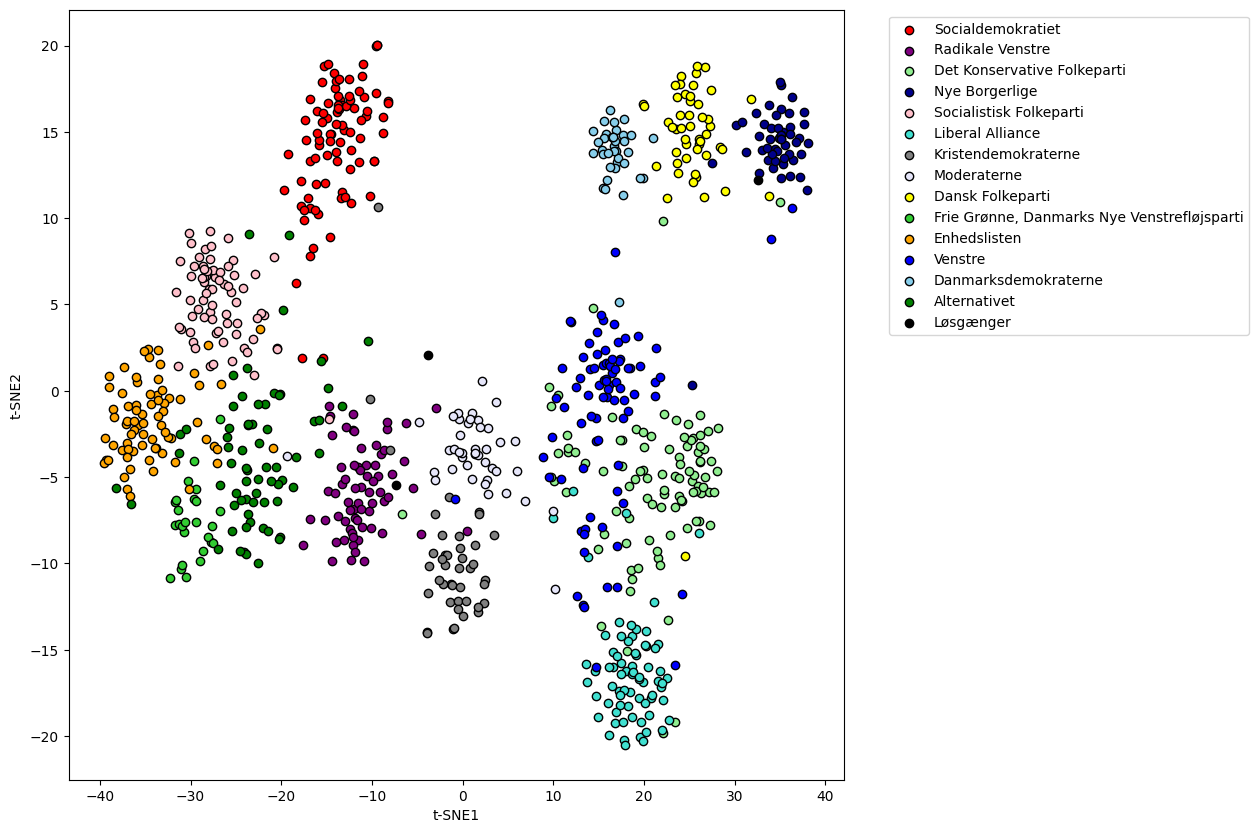

In [126]:
# now we are going to do dimensionality reduction using t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)

tsne_data = tsne.fit_transform(df)

tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'], index=df.index)

tsne_df['party'] = party_data

plt.figure(figsize=(10, 10))

for party in party_colors.keys():

    party_df = tsne_df[tsne_df['party'] == party]
    plt.scatter(party_df['t-SNE1'], party_df['t-SNE2'], c=party_colors[party], label=party, edgecolors='black')

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Looks like in T-SNE, the party clusters are more visible, there is bigger space between them in comparison to PCA.

### Clustering with K-Means, Hierarchical clustering, and DBSCAN

We will try clustering on both PCA and t-SNE data, in theory we know that there should be 15 clusters as this is the number of parties, but might be that algorithms will think of different numbers as the best ones, meaning current party system can be divided into more or less parties.

In [127]:

pca_df = pca_df.drop('party', axis=1)

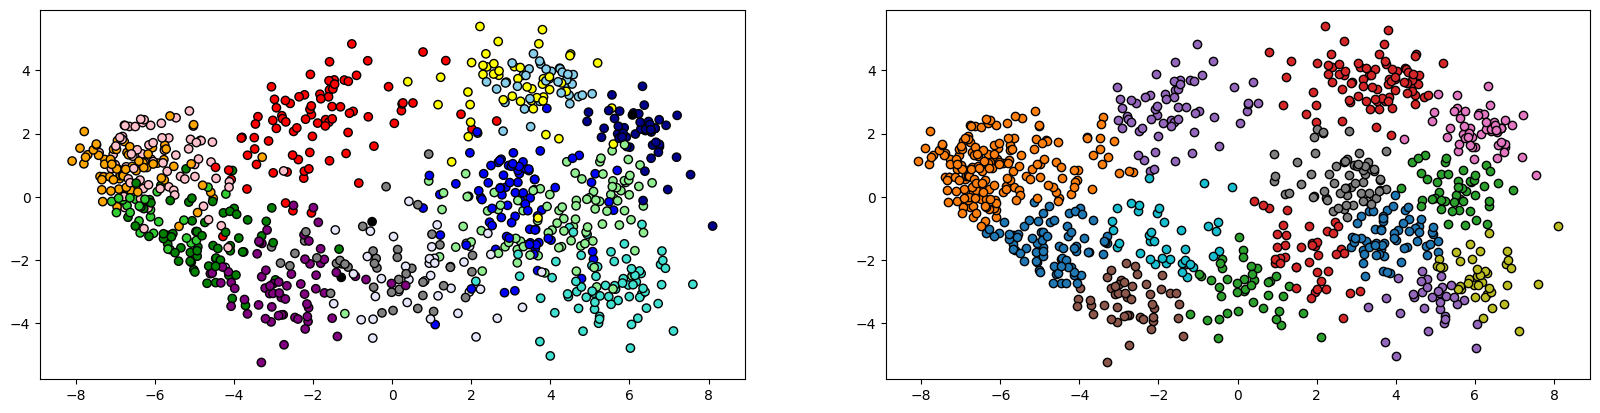

In [128]:
# starting with kmeans clustering
from sklearn.cluster import KMeans


fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)


ax[0].scatter(pca_df['PC1'], pca_df['PC2'], edgecolors='black', c=[party_colors[party] for party in party_data])

kmeans = KMeans(n_clusters=15)

kmeans.fit_predict(pca_df)

for i in range(15):
    cluster = pca_df[kmeans.labels_ == i]
    ax[1].scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {i}', edgecolors='black')


As we can see more or less, the data is clustered correctly, of course there are mistakes, especially when it comes to outliers, 
plus when 2 clusters are very interconnected it is hard to say where one ends and the other starts.

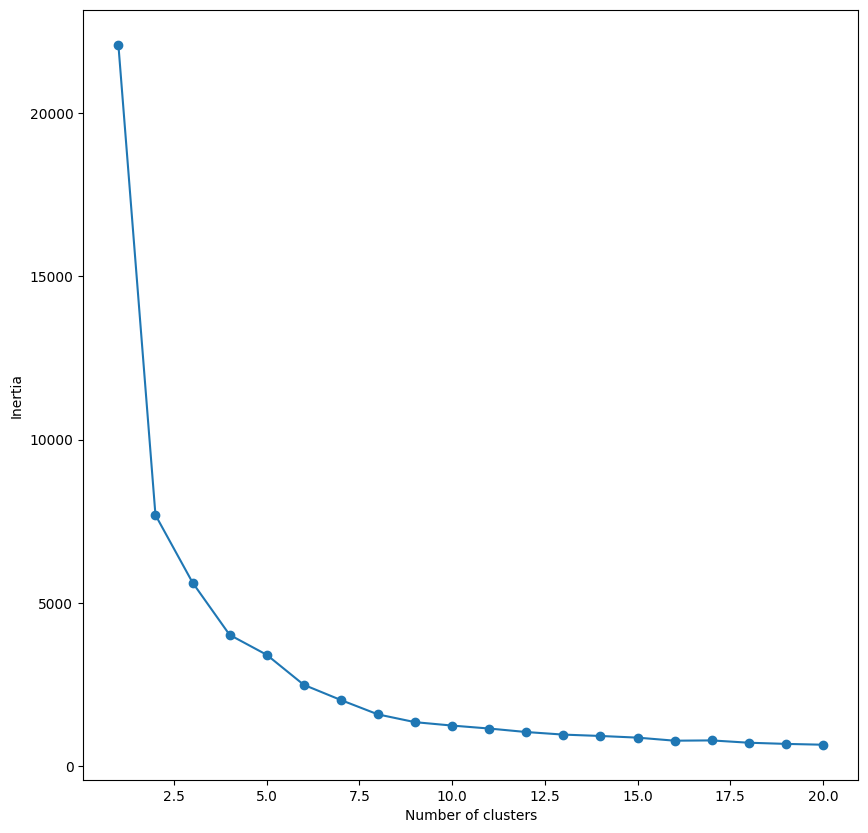

In [129]:
# now lets use elbow method to find the optimal number of clusters

inertia = []

for i in range(1, 21):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))

plt.plot(range(1, 21), inertia, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

Looks like using elbow method that the optimal number of clusters would be somewhere around 5, which is much less that current number of parties. Let's see how the clustering would like then

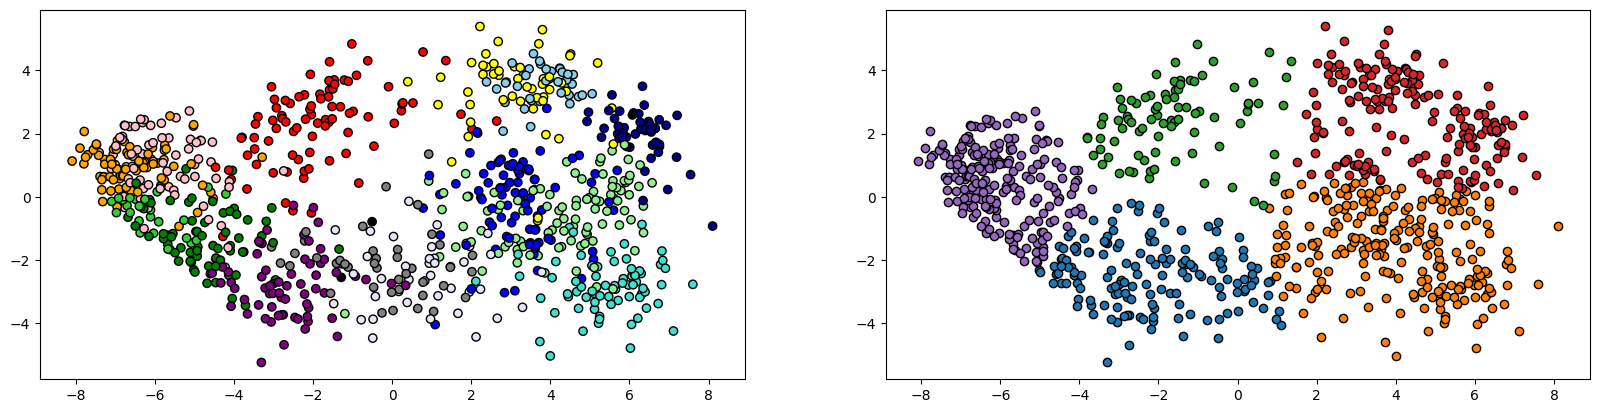

In [130]:
kmeans = KMeans(n_clusters=5)

kmeans.fit_predict(pca_df)

fig, ax = plt.subplots(1, 2)

fig.set_figwidth(20)

ax[0].scatter(pca_df['PC1'], pca_df['PC2'], edgecolors='black', c=[party_colors[party] for party in party_data])

for i in range(5):
    cluster = pca_df[kmeans.labels_ == i]
    ax[1].scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {i}', edgecolors='black')



Now the same on t-sne data

In [131]:
tsne_df = tsne_df.drop('party', axis=1)

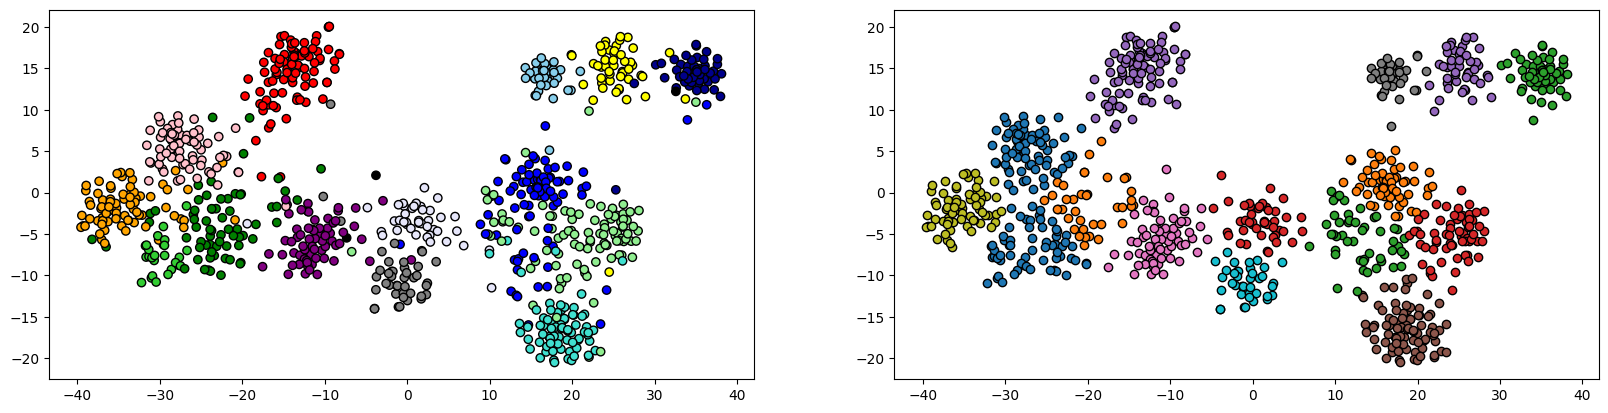

In [132]:
kmeans = KMeans(n_clusters=15)

fig, ax = plt.subplots(1, 2)

fig.set_figwidth(20)

ax[0].scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], edgecolors='black', c=[party_colors[party] for party in party_data])

kmeans.fit_predict(tsne_df)

for i in range(15):
    cluster = tsne_df[kmeans.labels_ == i]
    ax[1].scatter(cluster['t-SNE1'], cluster['t-SNE2'], label=f'Cluster {i}', edgecolors='black')

plt.show()


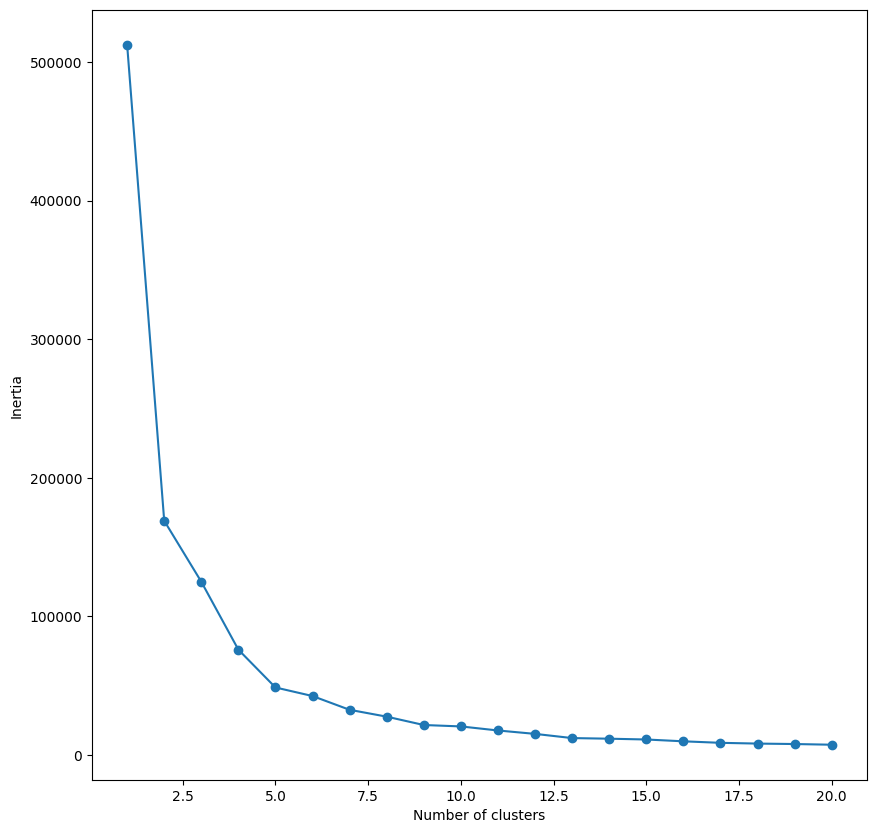

In [133]:
# elbow method for t-SNE

inertia = []

for i in range(1, 21):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tsne_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))

plt.plot(range(1, 21), inertia, marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Inertia')

plt.show()

Here also 5 parties seems to be the best number of clusters, maybe number of parties in Denmark should be reduced??

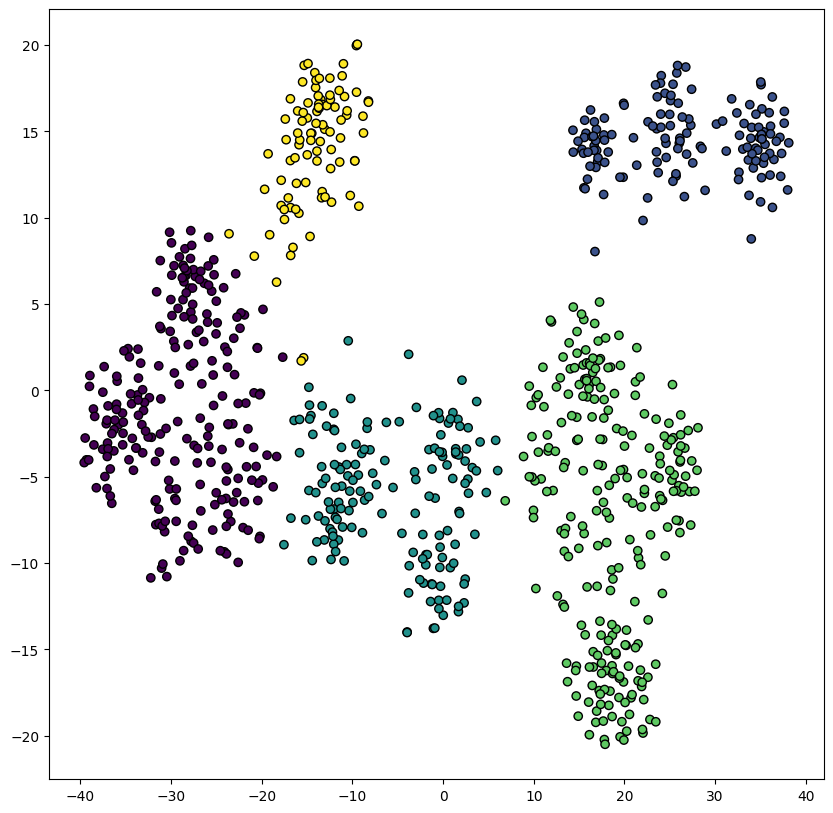

In [134]:
kmeans = KMeans(n_clusters=5)

kmeans.fit_predict(tsne_df)


fig = plt.figure(figsize=(10, 10))

plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], edgecolors='black', c=kmeans.labels_)

plt.show()

### Moving on to agglomerative clustering

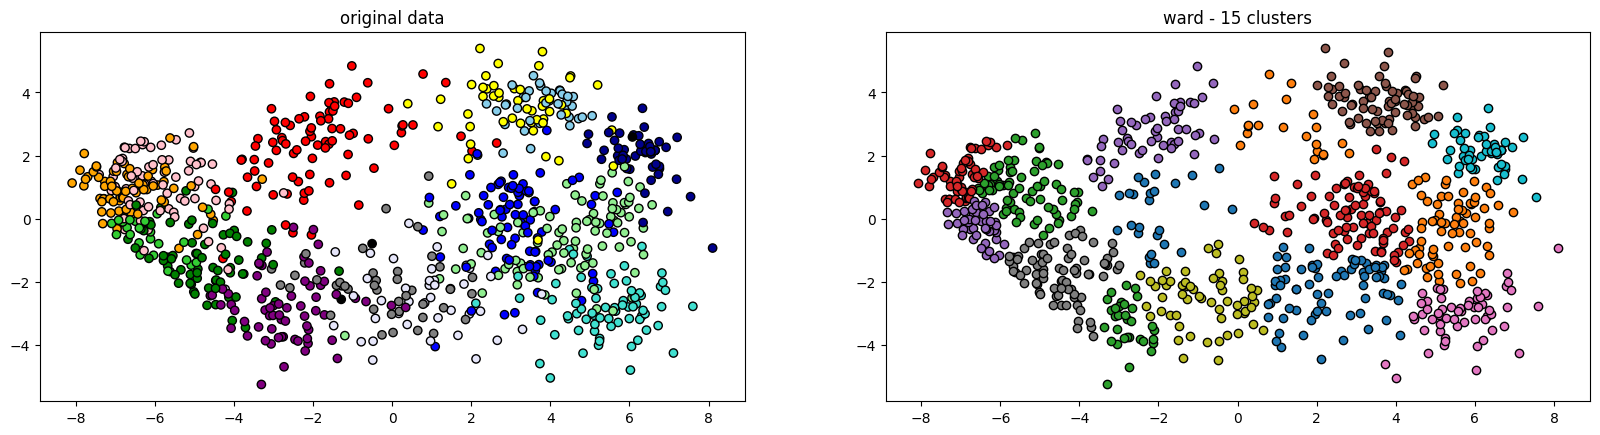

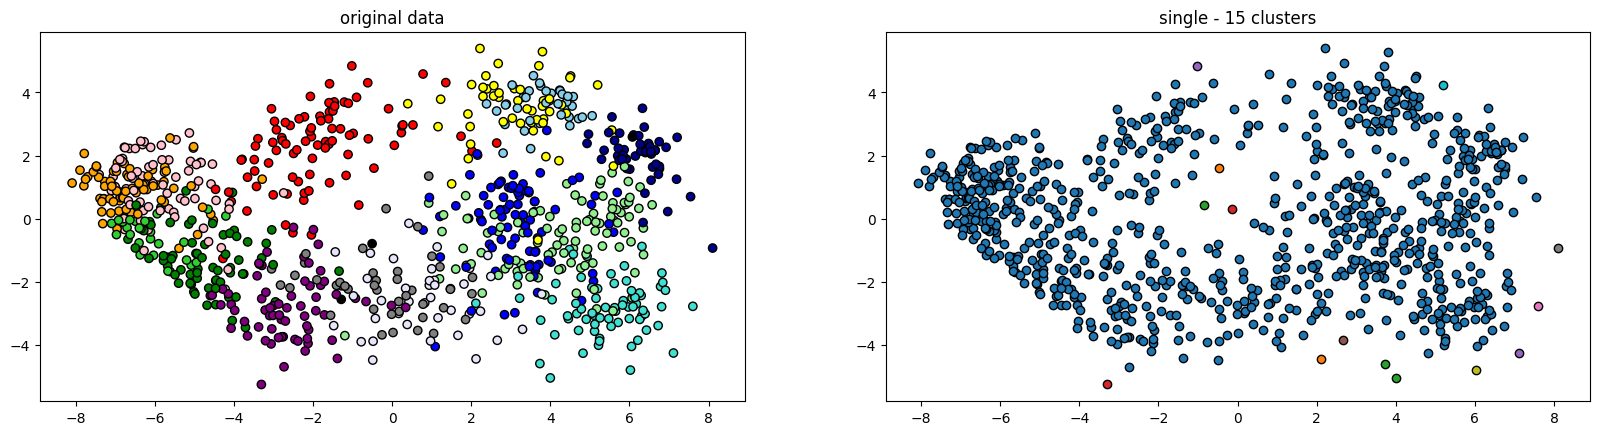

In [135]:
from sklearn.cluster import AgglomerativeClustering


def plot_agg_clustering(k, method, data):
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(20)


    ax[0].set_title(f'original data')


    ax[0].scatter(data.iloc[:,0], data.iloc[:,1], edgecolors='black', c=[party_colors[party] for party in party_data])

    agg = AgglomerativeClustering(n_clusters=k, linkage=method)

    agg.fit_predict(data)

    ax[1].set_title(f'{method} - {k} clusters')

    for i in range(k):
        cluster = data[agg.labels_ == i]
        ax[1].scatter(cluster.iloc[:,0], cluster.iloc[:,1], label=f'Cluster {i}', edgecolors='black')
    plt.show()

plot_agg_clustering(15, 'ward', pca_df)
plot_agg_clustering(15, 'single', pca_df)

Single linkage doesn't work completely as it is very sensitive to outliers

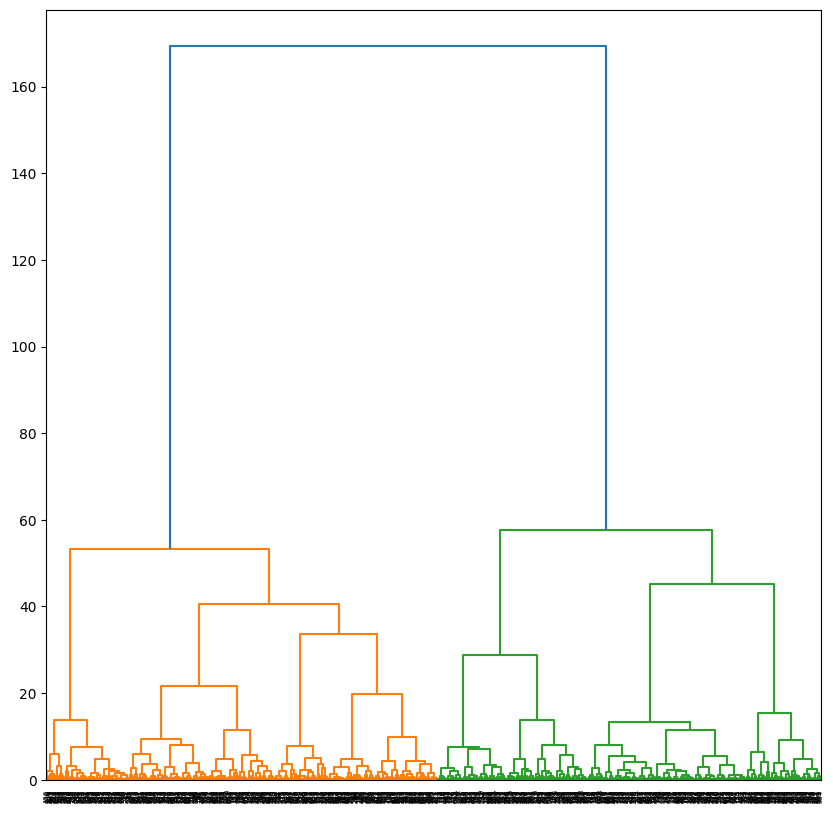

In [136]:
# plot dendrogram to get optimal number of clusters

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pca_df, 'ward')

plt.figure(figsize=(10, 10))

dendrogram(Z)

plt.show()

Looks like only 2 parties would be optimal for clustering, interesting

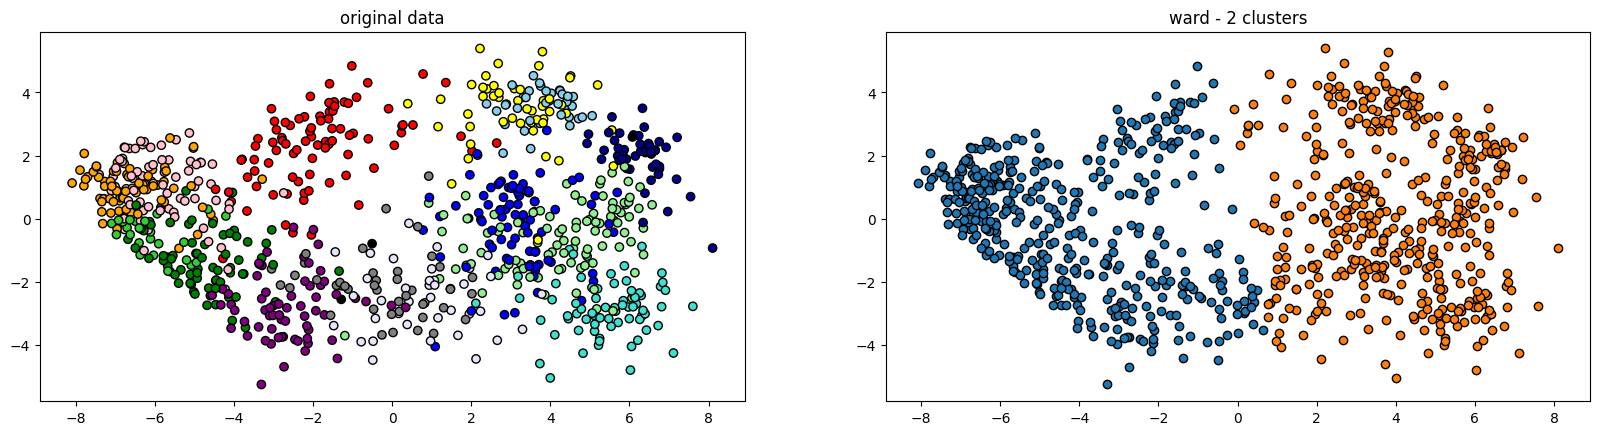

In [137]:
plot_agg_clustering(2, 'ward', pca_df)

Moving on to T-SNE data

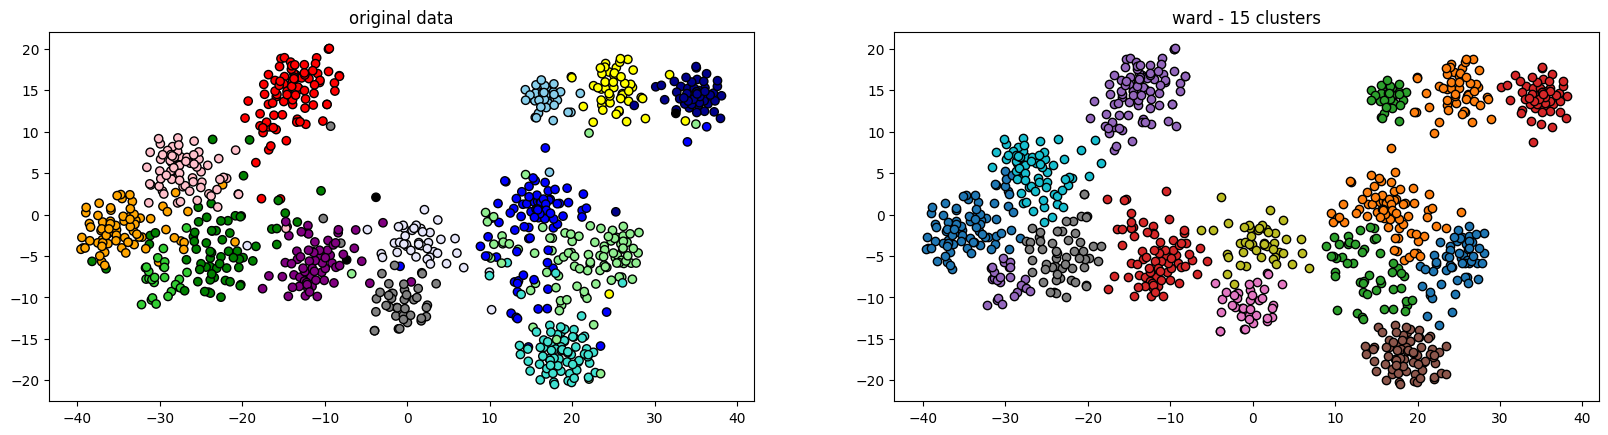

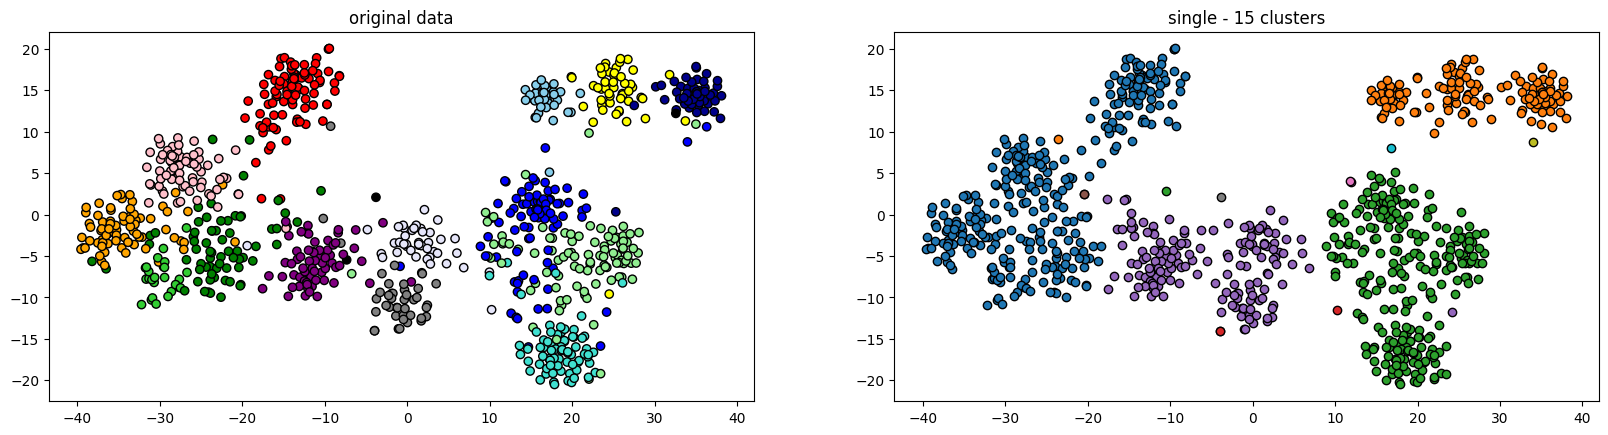

In [138]:
plot_agg_clustering(15, 'ward', tsne_df)

plot_agg_clustering(15, 'single', tsne_df)

Again single linkage didn't work, but ward linkage gave very good results, data is clusterent very nicely, with exception of some outliers

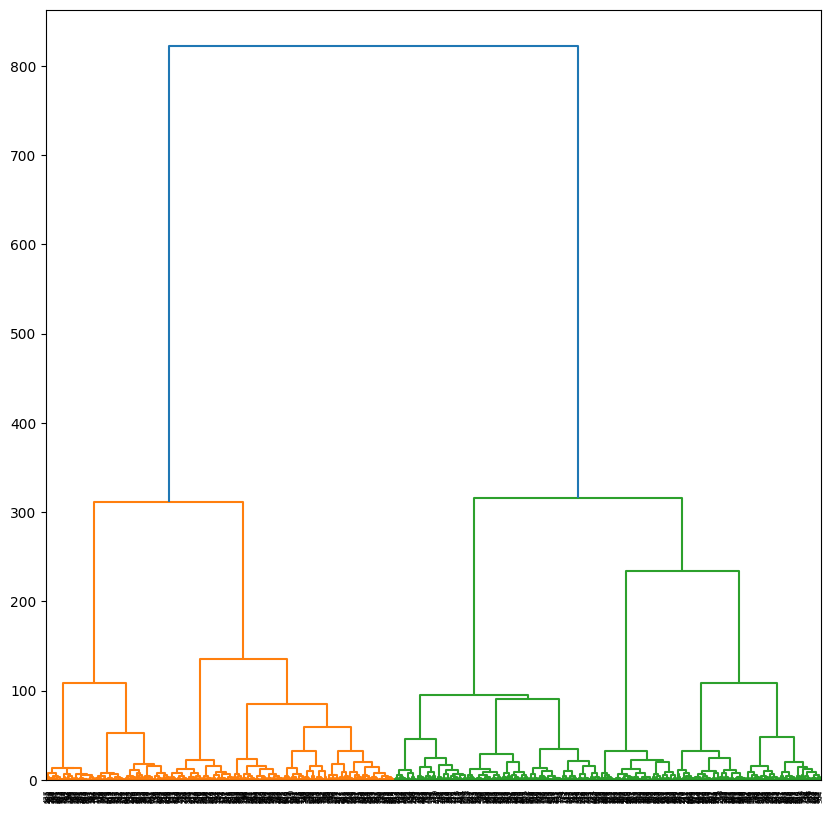

In [139]:
# dendrogram for t-SNE

Z = linkage(tsne_df, 'ward')

plt.figure(figsize=(10, 10))

dendrogram(Z)

plt.show()

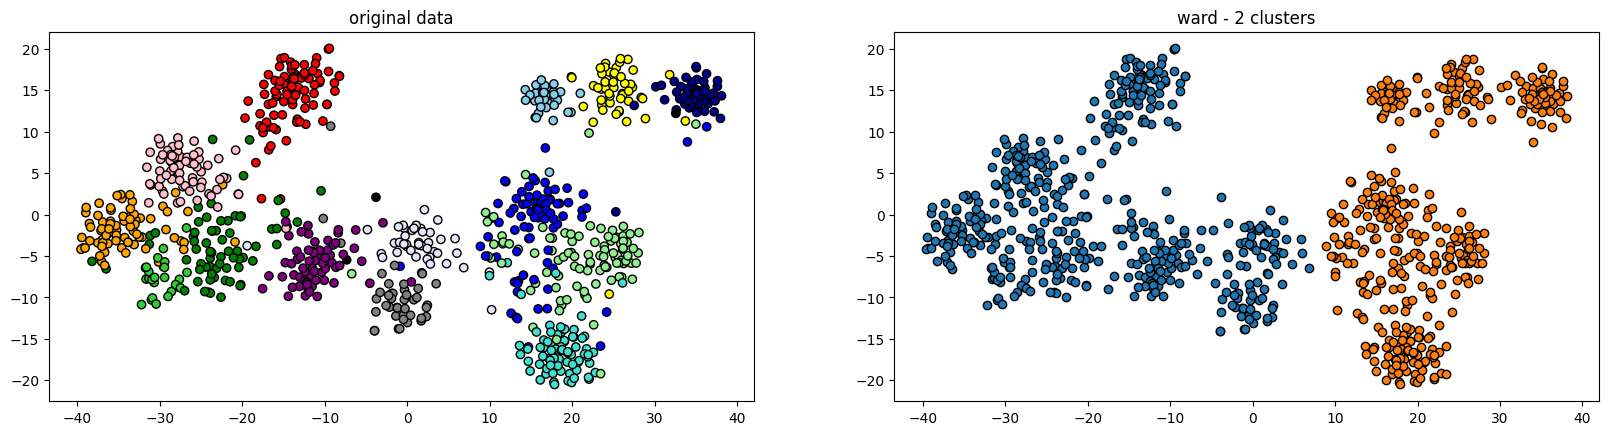

In [140]:
# again 2 parties seems to be the optimal number of clusters

plot_agg_clustering(2, 'ward', tsne_df)

### Let's move on to DBSCAN

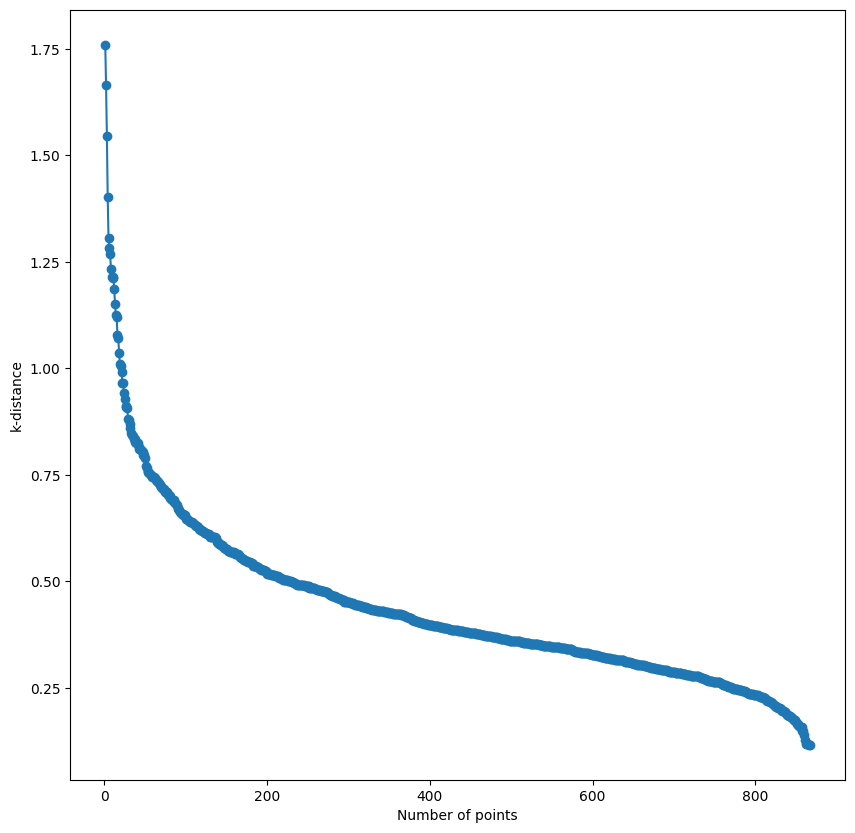

In [141]:
# first we need to find correct epsilon value, we can do it by plotting the distance between points and using kinda elbow method

def calculate_k_distance(X,k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X[i,:]-X[j,:]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

min_points = 5

k_distance = calculate_k_distance(pca_df.values, min_points)

plt.figure(figsize=(10, 10))

plt.plot(range(1, len(k_distance)+1), k_distance, marker='o')

plt.xlabel('Number of points')

plt.ylabel('k-distance')

plt.show()

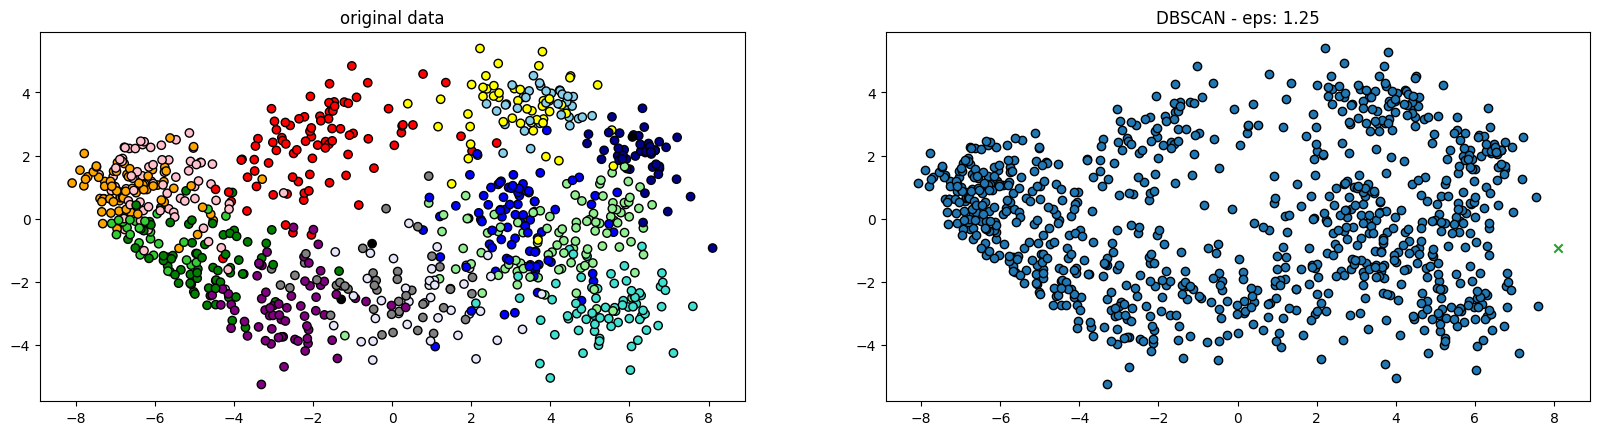

In [142]:
# looks like epsilon should be around 1

from sklearn.cluster import DBSCAN


eps = 1.25

def plot_dbscan(eps, data):
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(20)

    ax[0].set_title(f'original data') 
    ax[0].scatter(data.iloc[:,0], data.iloc[:,1], edgecolors='black', c=[party_colors[party] for party in party_data])

    dbscan = DBSCAN(eps=eps, min_samples = min_points)
    label = dbscan.fit_predict(data)

    ax[1].set_title(f'DBSCAN - eps: {eps}')

    for i in range(len(np.unique(label))):

        if i == -1:
            continue
        cluster = data[label == i]
        ax[1].scatter(cluster.iloc[:,0], cluster.iloc[:,1], label=f'Cluster {i}', edgecolors='black')
    
    # plot outliers as x
    cluster = data[label == -1]
    ax[1].scatter(cluster.iloc[:,0], cluster.iloc[:,1], label=f'Outliers',  marker='x')



    plt.show()

plot_dbscan(1.25, pca_df)

T-SNE

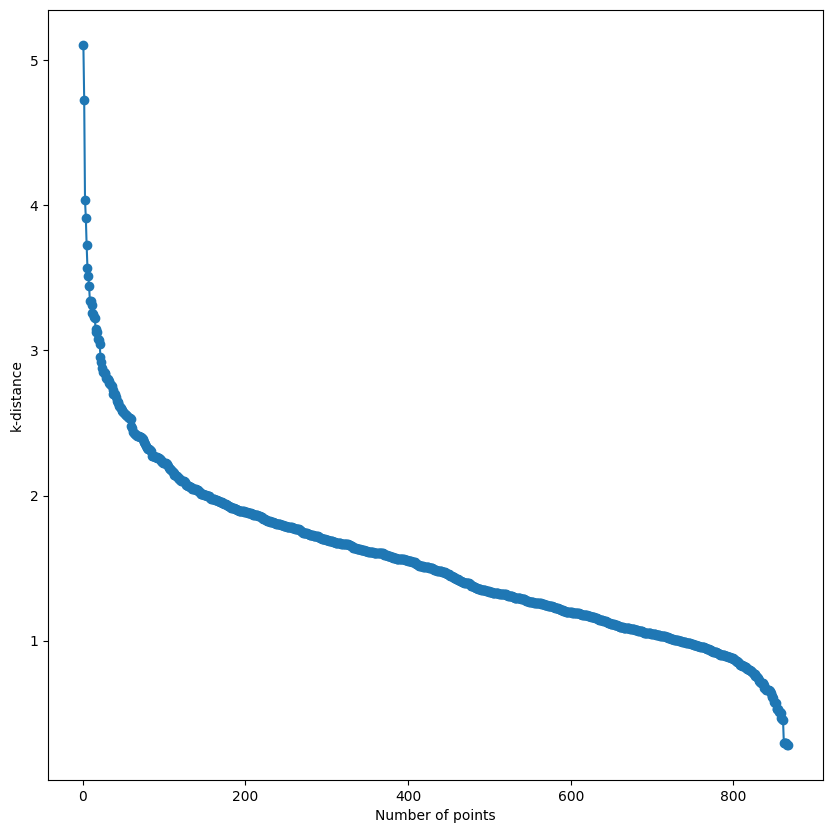

In [143]:
k_distance = calculate_k_distance(tsne_df.values, min_points)

plt.figure(figsize=(10, 10))

plt.plot(range(1, len(k_distance)+1), k_distance, marker='o')

plt.xlabel('Number of points')

plt.ylabel('k-distance')

plt.show()

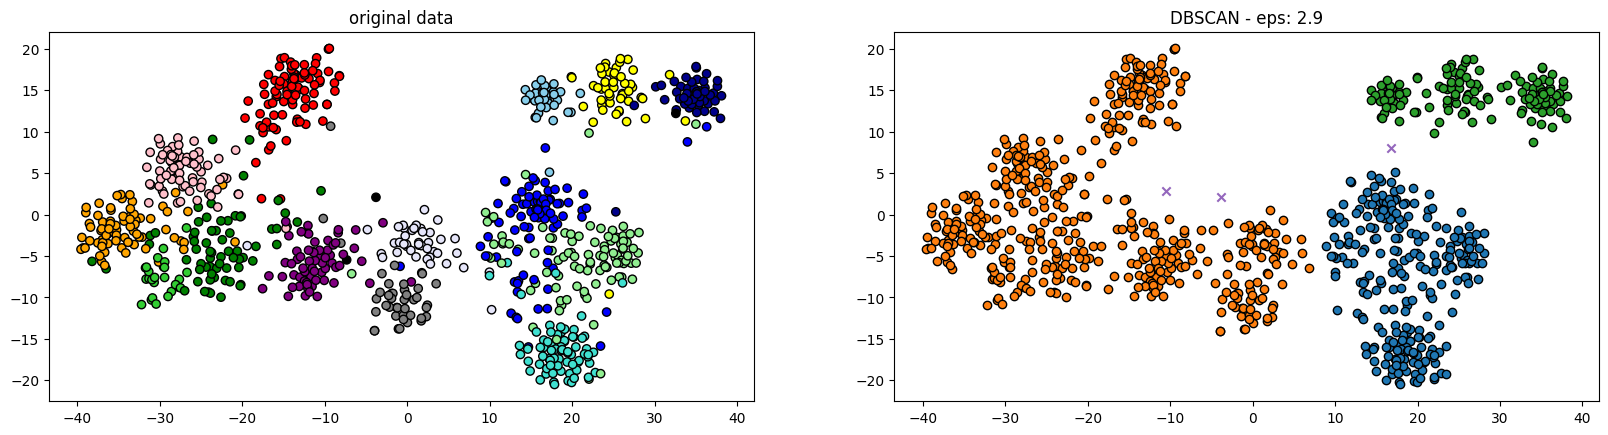

In [144]:
# looking at the graph we can see that epsilon should be around 3
epsilon = 2.9

plot_dbscan(epsilon, tsne_df)

DBSCAN is the worst one so far, it didn't manage to cluster the data correctly, the explanation could be probably the fact that the density of cluster varies and DBSCAN is sensitive to that.

### Now we are going to load data only from elected people, do T-SNE in order to visualize the data and then we can check which party has the most outliers and which members don't agree with their party the most

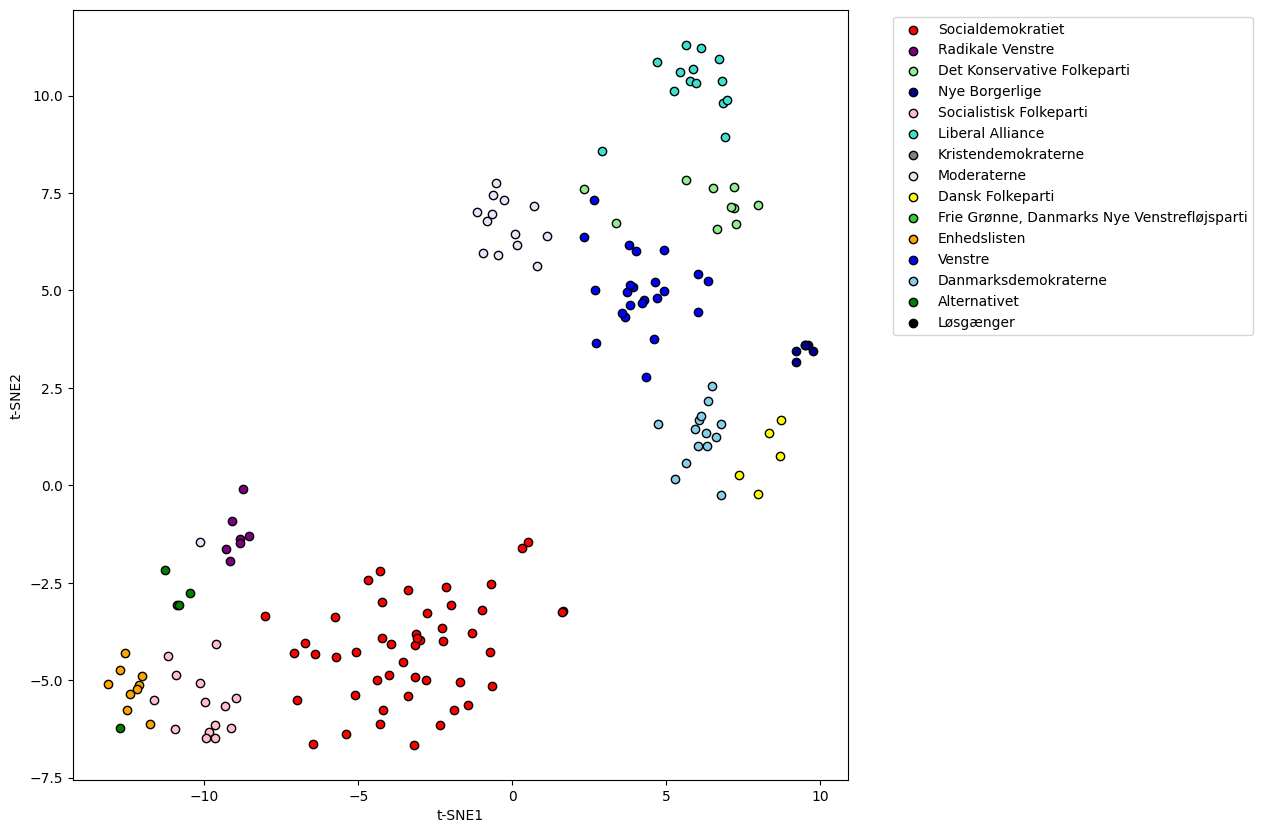

In [145]:
elected = pd.read_excel('electeddata.xlsx')

elected = elected.set_index('navn')

party_data = elected['parti']
elected = elected.drop(['alder', 'storkreds', 'parti'], axis=1)

scaler = StandardScaler()

elected = pd.DataFrame(scaler.fit_transform(elected), columns=elected.columns, index=elected.index)

tsne = TSNE(n_components=2)

tsne_data = tsne.fit_transform(elected)

tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'], index=elected.index)

tsne_df['party'] = party_data

fig =plt.figure(figsize=(10, 10))

for party in party_colors.keys():
    party_df = tsne_df[tsne_df['party'] == party]
    plt.scatter(party_df['t-SNE1'], party_df['t-SNE2'], c=party_colors[party], label=party, edgecolors='black')

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

It looks like Socialdemokratiet has the biggest number of differences, as their cluster is the biggest. There is one person from Moderaterne that answers questions in completely different way than the rest of the party; one member of Liberal Alliance is also pretty far off; and 2 members from Det Konservative Folkeparti are also quite away from the rest.

When it comes to agreeing, look like Radikale Venstre, Enhedslisten, Nye Borgelige have members that are on the same page, as their clusters are very tight.

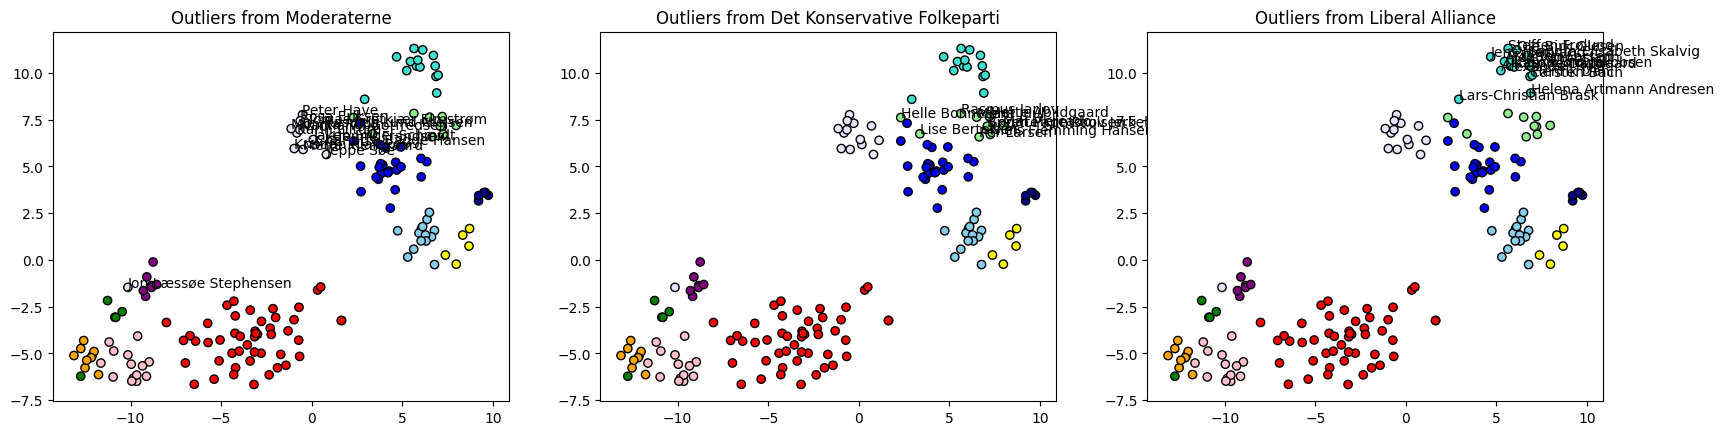

In [146]:
# create 3 subplots that will show the same data the differnce is that on each subplot differnet party candidates will be annotated with name

fig, ax = plt.subplots(1, 3)

fig.set_figwidth(20)

for i, party in enumerate(['Moderaterne', 'Det Konservative Folkeparti', 'Liberal Alliance']):

    party_df = tsne_df[tsne_df['party'] == party]
    ax[i].scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=[party_colors[party] for party in party_data], edgecolors='black')
    for name in party_df.index:
        ax[i].annotate(name, (party_df.loc[name, 't-SNE1'], party_df.loc[name, 't-SNE2']))

    ax[i].set_title(f'Outliers from {party}')

plt.show()

The 'outlier' from Moderaterne is Jon Laessoe Stephensen, the one from Liberal Alliance is Lars Christian Brask and the two from Det Konservative Folkeparti are Helle Bonnesen and Lise Bertelsen.